# 🛠 06. Transfer Learning in TensorFlow Part 3: Scaling-up Exercises

1. Take 3 of your own photos of food and use the trained model to make predictions on them, share your predictions with the other students in Discord and show off your Food Vision model 🍔👁.
2.vTrain a feature-extraction transfer learning model for 10 epochs on the same data and compare its performance versus a model which used feature extraction for 5 epochs and fine-tuning for 5 epochs (like we've used in this notebook). Which method is better?
3. Recreate the first model (the feature extraction model) with mixed_precision turned on.
* Does it make the model train faster?
* Does it effect the accuracy or performance of our model?
* What's the advantages of using mixed_precision training?

## 1 . Loading Previously Trained Model and Making Predictions

### Getting Helper Functions

In [ ]:
## Creating helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-02-01 01:36:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-01 01:36:25 (111 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import helper functions
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,compare_historys,walk_through_dir

### Getting data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
unzip_data('101_food_classes_10_percent.zip')

train_dir = '101_food_classes_10_percent/train/'
test_dir = '101_food_classes_10_percent/test/'

--2023-02-01 01:36:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  22.7MB/s    in 74s     

2023-02-01 01:37:45 (20.9 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224,224)

train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode='categorical',
                                                                                image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                               label_mode='categorical',
                                                                               image_size=IMG_SIZE,
                                                                               shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


### Load saved Model

In [ ]:
import tensorflow as tensorflow
# Donwload pretrained model pretrained earlier
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

--2023-02-01 01:38:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip’

06_101_food_class_1 100%[===================>]  44.59M  15.0MB/s    in 3.0s    

2023-02-01 01:38:04 (15.0 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip’ saved [46760742/46760742]



In [ ]:
# Unzip the data
unzip_data('06_101_food_class_10_percent_saved_big_dog_model.zip')

In [ ]:
# Loading the model
import tensorflow as tf
model = tf.keras.models.load_model('06_101_food_class_10_percent_saved_big_dog_model')

In [ ]:
# Evaluate the model (the one we just downloaded on test data)
results_downloaded_model = model.evaluate(test_data)
results_downloaded_model

790/790 [==============================] - 1297s 2s/step - loss: 1.8027 - accuracy: 0.6078


[1.802720308303833, 0.6077623963356018]

### Import a Picture

In [40]:
# Import required libraries
import numpy as np
import tensorflow as tf
from PIL import Image

# Read a PIL image  
img = Image.open('pizza.jpg')

# Resize
img = img.resize((224,224))


# Convert the PIL image to Tensor
# img_to_tensor = tf.convert_to_tensor(img)
img_to_tensor = np.array(img)

# print the converted Torch tensor
print(img_to_tensor)
print("dtype of tensor:",img_to_tensor.dtype)

[[[ 29  25  16]
  [ 28  24  15]
  [ 28  25  16]
  ...
  [118  58   2]
  [119  61   2]
  [132  71   1]]

 [[ 29  25  16]
  [ 29  25  16]
  [ 29  25  16]
  ...
  [112  57   5]
  [112  57   3]
  [121  62   2]]

 [[ 29  25  16]
  [ 29  25  16]
  [ 29  25  16]
  ...
  [ 92  45  10]
  [109  55   6]
  [120  64   5]]

 ...

 [[152  95  38]
  [155 101  45]
  [160 109  57]
  ...
  [201 138  83]
  [208 147  74]
  [212 148  54]]

 [[152  96  42]
  [156  99  40]
  [157 101  46]
  ...
  [204 142  79]
  [207 150 104]
  [209 146  70]]

 [[140  81  25]
  [151  93  38]
  [156  99  39]
  ...
  [203 145  84]
  [212 164 122]
  [212 176 144]]]
dtype of tensor: uint8


In [41]:
img_to_tensor.shape
image = img_to_tensor.reshape((1, 224, 224, 3))

### Predicting

In [42]:
pred_probs = model.predict(image)

1/1 [==============================] - 0s 28ms/step


In [43]:
pred_probs.argmax()

76

In [45]:
train_data_all_10_percent.class_names[76]

'pizza'

## 2 . Feature Extracting for 10 epochs

In [49]:
# Create checkpoint callback
checkpoint_path = '101_classes_10_percent_data_model_checkpoint'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights=True,
                                                         monitor='val_accuracy',
                                                         save_best_only=True)

In [46]:
# Create data augmentation layer to incorporate it right into the model
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation = Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2)
    # preprocessing.Rescaling(1/255.) 
],name='data_augmentation')

In [47]:
# Setup the bease model and freeze its layers (this will extract features)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup model architecture with tranable top layers
inputs = layers.Input(shape=(224,224,3),name='input_layer')
x = data_augmentation(inputs)
x = base_model(x,training=False) 
x = layers.GlobalAveragePooling2D(name='global_avg_pool_layer')(x)
outputs = layers.Dense(len(train_data_all_10_percent.class_names),activation='softmax',name='output_layer')(x)
model_1 = tf.keras.Model(inputs,outputs)

16705208/16705208 [==============================] - 2s 0us/step


In [48]:
# Compile the model
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [50]:
from tensorflow.python import test
# Fit the model
history_1 = model_1.fit(train_data_all_10_percent,
                      epochs = 10,
                      validation_data = test_data,
                      validation_steps = int(0.15*len(test_data)),
                      callbacks = [checkpoint_callback])

Epoch 1/10
237/237 [==============================] - ETA: 0s - loss: 3.3732 - accuracy: 0.2730

237/237 [==============================] - 121s 484ms/step - loss: 3.3732 - accuracy: 0.2730 - val_loss: 2.5621 - val_accuracy: 0.4372
Epoch 2/10
237/237 [==============================] - ETA: 0s - loss: 2.1935 - accuracy: 0.4981

237/237 [==============================] - 97s 407ms/step - loss: 2.1935 - accuracy: 0.4981 - val_loss: 2.0682 - val_accuracy: 0.5106
Epoch 3/10
237/237 [==============================] - ETA: 0s - loss: 1.8202 - accuracy: 0.5666

237/237 [==============================] - 94s 394ms/step - loss: 1.8202 - accuracy: 0.5666 - val_loss: 1.9043 - val_accuracy: 0.5289
Epoch 4/10
237/237 [==============================] - ETA: 0s - loss: 1.6046 - accuracy: 0.6153

237/237 [==============================] - 89s 375ms/step - loss: 1.6046 - accuracy: 0.6153 - val_loss: 1.8048 - val_accuracy: 0.5429
Epoch 5/10
237/237 [==============================] - ETA: 0s - loss: 1.4506 - accuracy: 0.6479

237/237 [==============================] - 86s 362ms/step - loss: 1.4506 - accuracy: 0.6479 - val_loss: 1.7658 - val_accuracy: 0.5474
Epoch 6/10
237/237 [==============================] - ETA: 0s - loss: 1.3187 - accuracy: 0.6754

237/237 [==============================] - 86s 361ms/step - loss: 1.3187 - accuracy: 0.6754 - val_loss: 1.7508 - val_accuracy: 0.5532
Epoch 7/10
237/237 [==============================] - 47s 195ms/step - loss: 1.2338 - accuracy: 0.6965 - val_loss: 1.7282 - val_accuracy: 0.5532
Epoch 8/10
237/237 [==============================] - 45s 188ms/step - loss: 1.1503 - accuracy: 0.7189 - val_loss: 1.7434 - val_accuracy: 0.5485
Epoch 9/10
237/237 [==============================] - ETA: 0s - loss: 1.0685 - accuracy: 0.7340

237/237 [==============================] - 81s 341ms/step - loss: 1.0685 - accuracy: 0.7340 - val_loss: 1.6862 - val_accuracy: 0.5596
Epoch 10/10
237/237 [==============================] - 43s 179ms/step - loss: 1.0116 - accuracy: 0.7518 - val_loss: 1.7611 - val_accuracy: 0.5408


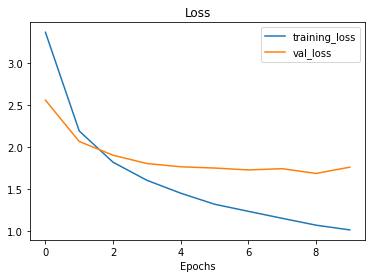

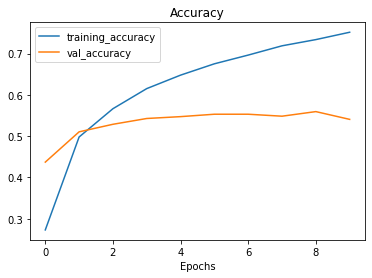

In [51]:
plot_loss_curves(history_1)

## 3 . Mixed Precision

In [52]:
# Turn on mized precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

In [53]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [54]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape=input_shape,name='input_layer')
# note: EffiecientNetBX model have rescaling built-in
# x= preprocessing.Rescaling(1./255)(x)
x = base_model(inputs,training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation('softmax',dtype=tf.float32,name='softmax_float32')(x)
model_mixed_precision = tf.keras.Model(inputs,outputs)

# Compile the model
model_mixed_precision.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

TypeError: ignored